# Summary of result
Creation of df/csv of all results

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import glob, sys, pickle, sobol_seq, numpy
from scipy.stats import norm, truncnorm, multivariate_normal
from scipy.special import logsumexp
from tqdm import tqdm
import pandas as pd
import copy
import random
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/canlab/Desktop/Modelling_Influenca/App_data/All_subjects_data.csv')

In [3]:
data

,Unnamed: 0,ID,Trial,Run,drawn_outcome,choice,win,p_reward_a
0,0,2,1,1,1,0,0,0.800000
1,1,2,2,1,0,1,0,0.787411
2,2,2,3,1,0,0,1,0.708686
3,3,2,4,1,0,0,1,0.610199
4,4,2,5,1,0,0,1,0.616570
...,...,...,...,...,...,...,...,...
568645,568645,353,146,1,1,1,1,0.390209
568646,568646,353,147,1,1,1,1,0.473773
568647,568647,353,148,1,0,1,0,0.463202
568648,568648,353,149,1,1,1,1,0.560426


In [4]:
tt=pd.read_csv('C:/Users/canlab/Desktop/Modelling_Influenca/fitVal10.csv')

In [5]:
tt

,ID,Run,alpha,beta,gamma,fval,meanRew
0,2,1,0.263606,3.588368,2.338957,38.082436,18.373333
1,2,2,0.305965,1.406477,5.480711,77.517370,13.166667
2,2,3,0.291668,3.896338,1.065802,55.054067,14.046667
3,2,4,0.254270,3.570691,1.954541,44.023664,13.306667
4,2,5,0.204458,2.887052,2.141625,49.997702,15.593333
...,...,...,...,...,...,...,...
2899,341,23,0.596366,2.861828,1.110861,49.474090,14.500000
2900,341,24,0.778848,2.354195,7.470783,48.380552,14.420000
2901,341,25,0.480466,1.923075,9.443787,63.906146,5.800000
2902,341,26,0.437638,3.486584,1.358016,52.911293,10.560000


In [8]:
id_max=342
df_wb = pd.DataFrame()
df_wh = pd.DataFrame()
df_nn = pd.DataFrame()

dfs_wb=[]
dfs_wh=[]
dfs_nn=[]


df_comb_wb = pd.DataFrame()
list_=[]
for sub in range(4, (id_max+1)):
    # load fitting data
    
    data_ = data[data["ID"] == sub]
    test=data_["Run"].to_numpy()
    
    #print('Run: ', test)
    
    # subject exists
    if len(test)!=0:
        num_run = np.max(test)

        # number of runs over 20
        if num_run > 20:
            curr_sub=np.load('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/subject_{}_median_parameters_all_models.pkl'.format(sub), allow_pickle=True)
            curr_sub_inf =np.load('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/subject_{}_Inference_all_models.pkl'.format(sub), allow_pickle=True)
            
            # list of subjects
            list_.append(str(sub))
            print(list_)
            # load the fitted parameters
            wb = pd.DataFrame(curr_sub[0])
            wb.columns = ['alpha', 'beta', 'zeta']
            wh = pd.DataFrame(curr_sub[1])
            wh.columns = ['alpha', 'beta', 'zeta']
            nn = pd.DataFrame(curr_sub[2])
            nn.columns = ['alpha', 'beta', 'zeta']
            # load likelihood
            llkd = pd.DataFrame(curr_sub[3])
            llkd.columns = ['weber', 'white', 'none']
            
            # concat parameters and llkd in one df 
            wb['llkd'] = llkd[['weber']]
            wh['llkd'] = llkd[['white']]
            nn['llkd'] = llkd[['none']]
            
            
            # load R^2
            R_wb = pd.DataFrame(curr_sub_inf[1])
            R_wb.columns = ['alpha', 'beta', 'zeta']
            R_wh = pd.DataFrame(curr_sub_inf[3])
            R_wh.columns = ['alpha', 'beta', 'zeta']
            R_nn = pd.DataFrame(curr_sub_inf[5])
            R_nn.columns = ['alpha', 'beta', 'zeta']
            
            
            
            # R^2
            wb['R: alpha'] = R_wb[['alpha']]
            wh['R: alpha'] = R_wh[['alpha']]
            nn['R: alpha'] = R_nn[['alpha']]
            
            wb['R: beta'] = R_wb[['beta']]
            wh['R: beta'] = R_wh[['beta']]
            nn['R: beta'] = R_nn[['beta']]
            
            wb['R: zeta'] = R_wb[['zeta']]
            wh['R: zeta'] = R_wh[['zeta']]
            nn['R: zeta'] = R_nn[['zeta']]
            
            # save in list for concatenation later
            dfs_wb.append(wb)
            dfs_wh.append(wh)
            dfs_nn.append(nn)
            

        else: 
            continue
    else:
        continue
    
wb_fit=pd.concat(dfs_wb,keys=list_, names = ['ID', 'Run'])
wh_fit=pd.concat(dfs_wh,keys=list_, names = ['ID', 'Run'])
nn_fit=pd.concat(dfs_nn,keys=list_, names = ['ID', 'Run'])

# save to pkl
wb_fit.to_pickle("C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/Weber_fitting_results.pkl")
wh_fit.to_pickle("C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/White_fitting_results.pkl")
nn_fit.to_pickle("C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/None_fitting_results.pkl")

# save to csv
wb_fit.to_csv('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/Weber_fitting_results_table.csv')
wh_fit.to_csv('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/White_fitting_results_table.csv')
nn_fit.to_csv('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/None_fitting_results_table.csv')

['4']
['4', '6']
['4', '6', '8']
['4', '6', '8', '10']
['4', '6', '8', '10', '13']
['4', '6', '8', '10', '13', '15']
['4', '6', '8', '10', '13', '15', '16']
['4', '6', '8', '10', '13', '15', '16', '21']
['4', '6', '8', '10', '13', '15', '16', '21', '24']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68']
['4', '

['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '166', '176', '179', '184', '185', '189', '190', '195', '198', '210', '216', '218', '220', '221', '222']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '166', '176', '179', '184', '185', '189', '190', '195', '198', '210', '216', '218', '220', '221', '222', '223']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '16

['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '166', '176', '179', '184', '185', '189', '190', '195', '198', '210', '216', '218', '220', '221', '222', '223', '225', '227', '229', '231', '233', '238', '243', '246', '251', '252', '259', '260', '269', '271', '278', '282', '283', '284', '285', '306', '307', '311', '313', '319', '324', '333', '341']


In [87]:
wb_fit

alpha      beta      zeta       llkd  R: alpha   R: beta   R: zeta
ID  Run                                                                       
4   0    0.302213  0.423913  1.074786 -88.196072  1.041465  1.001490  1.018581
    1    0.169644  0.181967  0.805850 -70.888338  1.000137  1.036891  1.026518
    2    0.128943  0.091147  0.754634 -54.402455  1.009505  1.004921  1.044324
    3    0.197204  0.102186  0.606535 -46.581652  1.050078  1.031837  1.008363
    4    0.245494  0.299987  0.921032 -80.763964  1.030587  1.014235  1.038847
...           ...       ...       ...        ...       ...       ...       ...
341 22   0.478542  0.267438  0.178090 -48.388401  1.019837  1.012203  1.005751
    23   0.481532  0.247657  0.230789 -48.323619  1.002065  1.019951  1.023687
    24   0.464242  0.245266  0.298868 -52.803688  1.031960  1.010043  1.011816
    25   0.456939  0.208860  0.323325 -49.074380  1.017266  1.016731  1.006824
    26   0.487246  0.252973  0.124097 -52.381473  1.018613  1.000826  1.043091

[2482 rows x 7 columns]

# Results of simulation

In [84]:

id_max=342
df_wb = pd.DataFrame()
df_wh = pd.DataFrame()
df_nn = pd.DataFrame()

dfs_wb=[]
dfs_wh=[]
dfs_nn=[]

dfs_wb_runs=[]
dfs_wh_runs=[]
dfs_nn_runs=[]


df_comb_wb = pd.DataFrame()
list_=[]



for sub in range(4, (id_max+1)):
    # load fitting data
    
    data_ = data[data["ID"] == sub]
    test=data_["Run"].to_numpy()
    
    #print('Run: ', test)
    
    # subject exists
    if len(test)!=0:
        num_run = np.max(test)

        # number of runs over 20
        if num_run > 20:
            
            curr_sub_p_a = np.load('C:/Users/canlab/Desktop/Modelling_Influenca/Results/All_Subjects/Simulation/subject_{}_p_a_median.pkl'.format(sub), allow_pickle=True)
            curr_sub_ch = np.load('C:/Users/canlab/Desktop/Modelling_Influenca/Results/All_Subjects/Simulation/subject_{}_simulated_choices.pkl'.format(sub), allow_pickle=True)

            
            # list of subjects
            list_.append(str(sub))
            print(list_)
            

            
            
            list_runs=[]
            
            for run in range(0, num_run):
                
                #wb = pd.DataFrame()
                #wh = pd.DataFrame()
                #nn = pd.DataFrame()
                list_runs.append((run+1))
                # new loop for the trials?
                #or just reshaping array to 1 x (runsx150)


                                
                # choice
                
                wb = pd.DataFrame(curr_sub_ch[0][run])
                wb.columns = ['simulated choice']
                wh = pd.DataFrame(curr_sub_ch[1][run])
                wh.columns = ['simulated choice']
                nn = pd.DataFrame(curr_sub_ch[2][run])
                nn.columns = ['simulated choice']
                
                # p_a

                p_a_wb_df = pd.DataFrame(curr_sub_p_a[0][run]) # weber
                p_a_wb_df.columns = ['A', 'B']
                p_a_wh_df = pd.DataFrame(curr_sub_p_a[1][run]) # white
                p_a_wh_df.columns = ['A', 'B']
                p_a_nn_df = pd.DataFrame(curr_sub_p_a[2][run]) # none
                p_a_nn_df.columns = ['A', 'B']

                
                # concat choice & p_A

                wb['p_A'] = p_a_wb_df[['A']]
                wh['p_A'] = p_a_wh_df[['A']]
                nn['p_A'] = p_a_nn_df[['A']]

            
                # append the df from the runs as a list
                dfs_wb_runs.append(wb)
                dfs_wh_runs.append(wh)
                dfs_nn_runs.append(nn)
                
            
            
            wb_=pd.concat(dfs_wb_runs,keys=list_runs, names = ['Run', 'Trial'])
            wh_=pd.concat(dfs_wh_runs,keys=list_runs, names = ['Run', 'Trial'])
            nn_=pd.concat(dfs_nn_runs,keys=list_runs, names = ['Run', 'Trial'])


            # save in list for concatenation later
            dfs_wb.append(wb_)
            dfs_wh.append(wh_)
            dfs_nn.append(nn_)
            

        else: 
            continue
    else:
        continue


wb_all=pd.concat(dfs_wb,keys=list_, names = ['ID', 'Run', 'Trial'])
wh_all=pd.concat(dfs_wh,keys=list_, names = ['ID', 'Run', 'Trial'])
nn_all=pd.concat(dfs_nn,keys=list_, names = ['ID', 'Run', 'Trial'])

wb_AB=pd.DataFrame(wb_all.replace([0,1], ['A', 'B']))
wh_AB=pd.DataFrame(wh_all.replace([0,1], ['A', 'B']))
nn_AB=pd.DataFrame(nn_all.replace([0,1], ['A', 'B']))


wb_AB.to_csv('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/Weber_simulation_results_table.csv')
wh_AB.to_csv('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/White_simulation_results_table.csv')
nn_AB.to_csv('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Fit_all_subjects/Fitting_results/None_simulation_results_table.csv')

['4']
['4', '6']
['4', '6', '8']
['4', '6', '8', '10']
['4', '6', '8', '10', '13']
['4', '6', '8', '10', '13', '15']
['4', '6', '8', '10', '13', '15', '16']
['4', '6', '8', '10', '13', '15', '16', '21']
['4', '6', '8', '10', '13', '15', '16', '21', '24']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68']
['4', '

['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '166', '176', '179', '184', '185', '189', '190', '195', '198', '210', '216', '218', '220']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '166', '176', '179', '184', '185', '189', '190', '195', '198', '210', '216', '218', '220', '221']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '166', '176', '179', '184', '18

['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '166', '176', '179', '184', '185', '189', '190', '195', '198', '210', '216', '218', '220', '221', '222', '223', '225', '227', '229', '231', '233', '238', '243', '246', '251', '252', '259', '260', '269', '271', '278', '282', '283', '284']
['4', '6', '8', '10', '13', '15', '16', '21', '24', '37', '48', '54', '55', '60', '63', '65', '66', '68', '90', '91', '92', '94', '97', '98', '99', '108', '112', '113', '117', '119', '141', '142', '143', '148', '150', '152', '153', '155', '156', '157', '164', '166', '176', '179', '184', '185', '189', '190', '195', '198', '210', '216', '218', '220', '221', '222', '223', '225', '227', '229', '231', '233', '238', '243', '246', '251', '252', '259', '260', '269', '271', '278', '282', '283', '284', '285

In [80]:
wb_all

simulated choice       p_A
ID  Run Trial                            
4   1   0                     1  0.500000
        1                     1  0.275271
        2                     0  0.807902
        3                     0  0.912972
        4                     0  0.786671
...                         ...       ...
341 27  145                   0  0.877603
        146                   0  0.948424
        147                   0  0.975785
        148                   0  0.986047
        149                   0  0.885804

[372300 rows x 2 columns]

In [85]:
wb_AB

simulated choice       p_A
ID  Run Trial                           
4   1   0                    B  0.500000
        1                    B  0.275271
        2                    A  0.807902
        3                    A  0.912972
        4                    A  0.786671
...                        ...       ...
341 27  145                  A  0.877603
        146                  A  0.948424
        147                  A  0.975785
        148                  A  0.986047
        149                  A  0.885804

[372300 rows x 2 columns]

### Correlation between the parameters 

Correlation between the parameters in the runs

In [209]:
d=wh_.loc['4']
d[['alpha']]

,alpha
Run,
0,0.420634
1,0.212366
2,0.213967
3,0.225857
4,0.282768
5,0.398906
6,0.250138
7,0.172216
8,0.452770


In [196]:
%matplotlib notebook
# sub: str, noise: str
def calculcate_correlation(sub, data, noise):
    
    df_ = data.loc[sub]
    ax=sns.regplot(data=df_, x="alpha", y="beta")
    #ax.legend(fontsize = 15, bbox_to_anchor= (1.03, 1),title="Choice", title_fontsize = 15)
    sns.despine(top=True,offset=5)
    #plt.xlim(0.1, 0.4)
    #plt.ylim(0.1, 0.4)
    plt.xlabel('alpha', fontsize=24)
    plt.ylabel('beta', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.title(noise, fontsize=24)
    sns.despine(top=True,offset=5)
    plt.tight_layout()
    plt.savefig('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Subject_{}_noise_{}'.format(sub, noise), dpi=250)

<IPython.core.display.Javascript object>


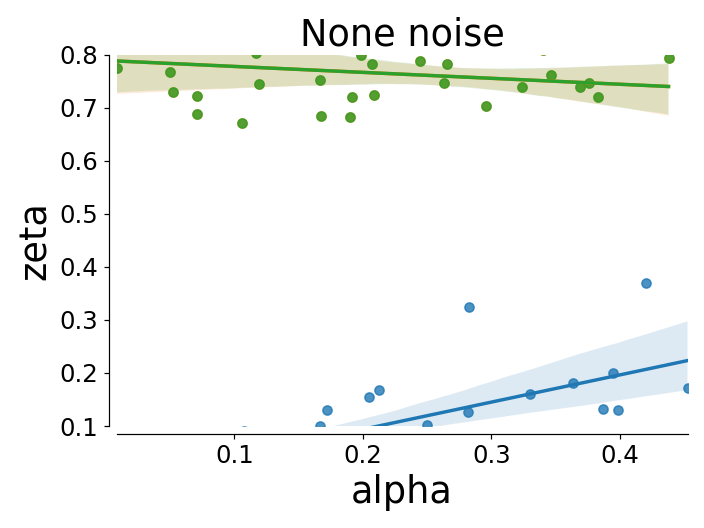

In [197]:
calculcate_correlation('4', wh_, 'White noise')

<IPython.core.display.Javascript object>


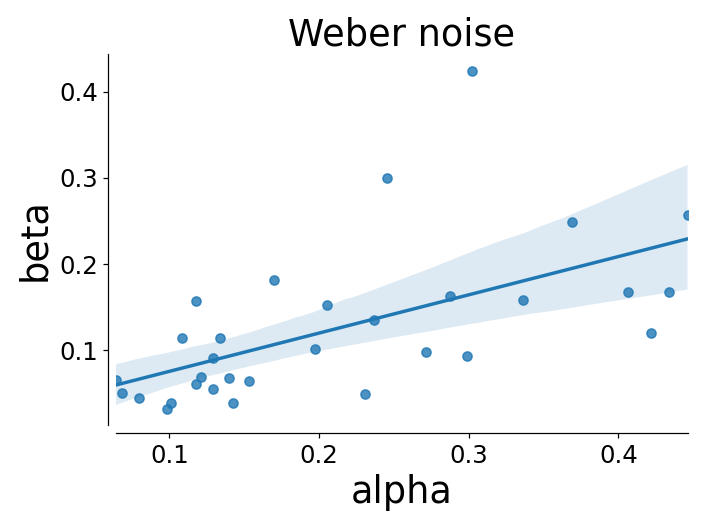

In [182]:
calculcate_correlation('4', wb_, 'Weber noise')

<IPython.core.display.Javascript object>


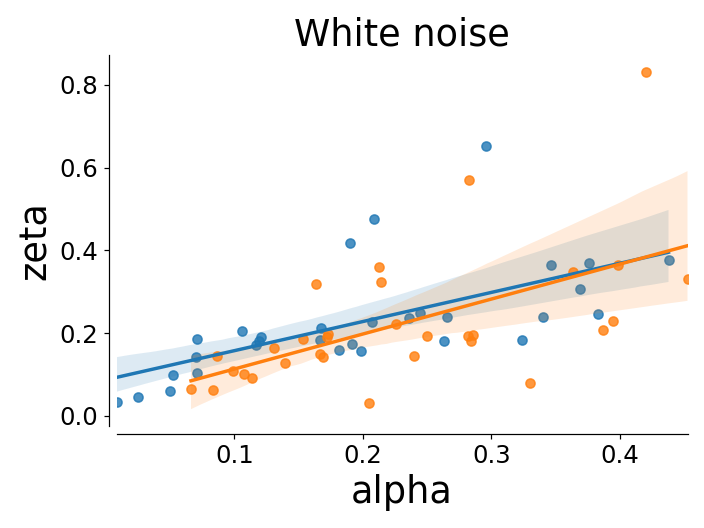

In [183]:
calculcate_correlation('4', nn_, 'None noise')

In [202]:
def calculcate_correlation_1(sub, data, noise):
    
    df_ = data.loc[sub]
    ax=sns.regplot(data=df_, x="alpha", y="zeta")
    #ax.legend(fontsize = 15, bbox_to_anchor= (1.03, 1),title="Choice", title_fontsize = 15)
    sns.despine(top=True,offset=5)
    plt.xlabel('alpha', fontsize=24)
    plt.ylabel('zeta', fontsize=24)
    #plt.ylim(0.1, 0.8)
    plt.tick_params(labelsize=16)
    plt.title(noise, fontsize=24)
    sns.despine(top=True,offset=5)
    plt.tight_layout()
    plt.savefig('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Subject_{}_noise_{}_1'.format(sub, noise), dpi=250)

<IPython.core.display.Javascript object>


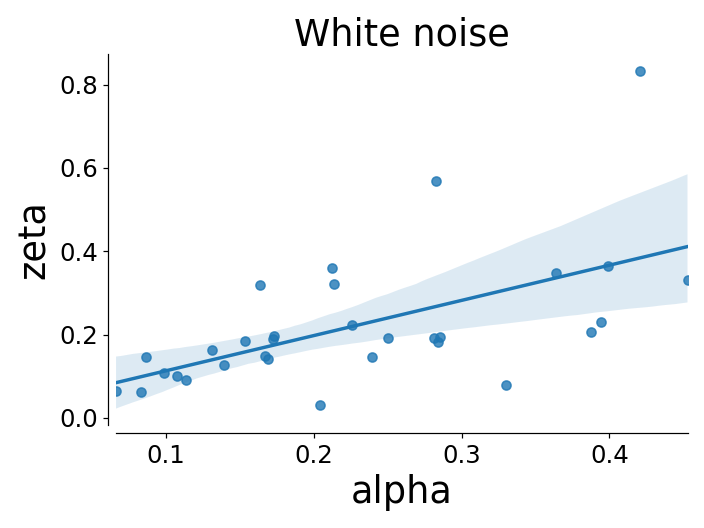

In [187]:
calculcate_correlation_1('4', wh_, 'White noise')

<IPython.core.display.Javascript object>


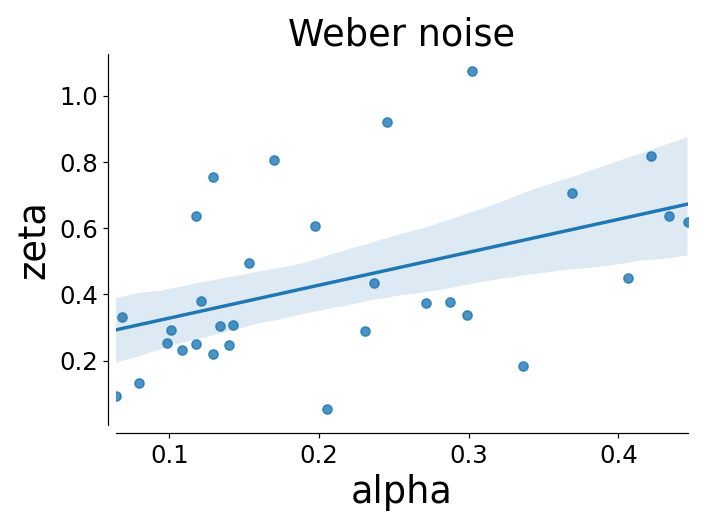

In [188]:
calculcate_correlation_1('4', wb_, 'Weber noise')

<IPython.core.display.Javascript object>


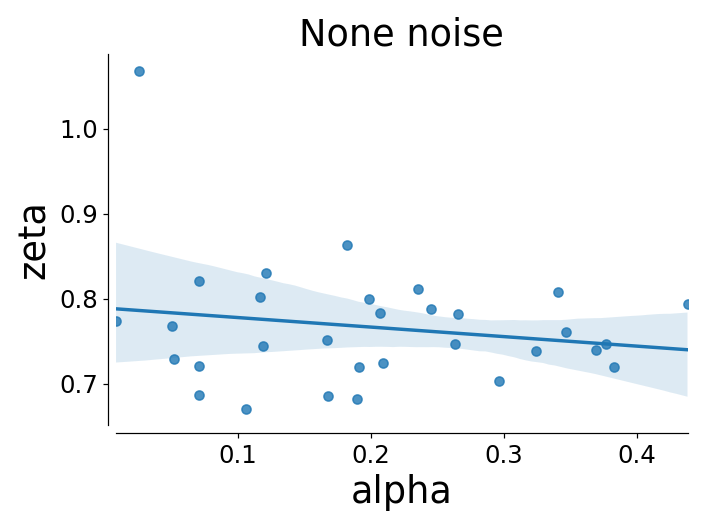

In [203]:
calculcate_correlation_1('4', nn_, 'None noise')

In [204]:
def calculcate_correlation_2(sub, data, noise):
    
    df_ = data.loc[sub]
    ax=sns.regplot(data=df_, x="beta", y="zeta")
    #ax.legend(fontsize = 15, bbox_to_anchor= (1.03, 1),title="Choice", title_fontsize = 15)
    sns.despine(top=True,offset=5)
    plt.xlabel('beta', fontsize=24)
    plt.ylabel('zeta', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.title(noise, fontsize=24)
    sns.despine(top=True,offset=5)
    plt.tight_layout()
    plt.savefig('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Subject_{}_noise_{}_2'.format(sub, noise), dpi=250)

<IPython.core.display.Javascript object>


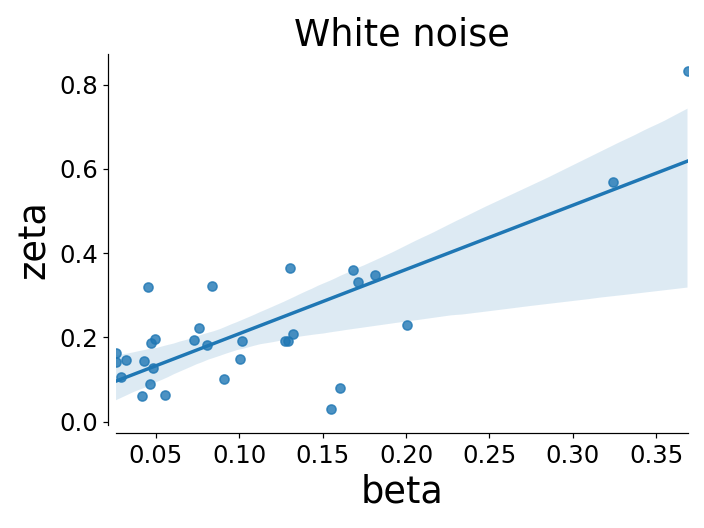

In [205]:
calculcate_correlation_2('4', wh_, 'White noise')

<IPython.core.display.Javascript object>


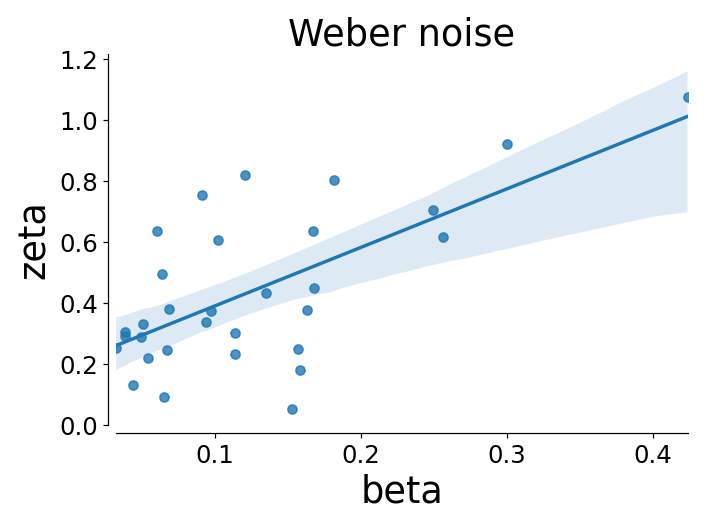

In [206]:
calculcate_correlation_2('4', wb_, 'Weber noise')

<IPython.core.display.Javascript object>


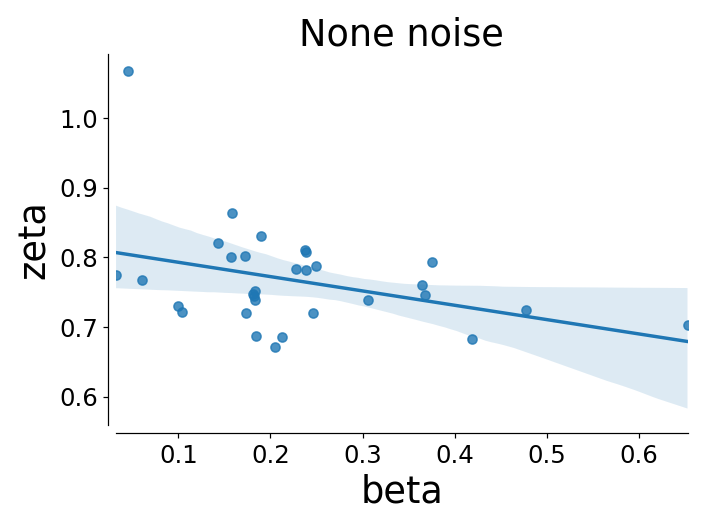

In [207]:
calculcate_correlation_2('4', nn_, 'None noise')

In [213]:
wb_

alpha      beta      zeta       llkd
ID  Run                                         
4   0    0.302213  0.423913  1.074786 -88.196072
    1    0.169644  0.181967  0.805850 -70.888338
    2    0.128943  0.091147  0.754634 -54.402455
    3    0.197204  0.102186  0.606535 -46.581652
    4    0.245494  0.299987  0.921032 -80.763964
...           ...       ...       ...        ...
341 22   0.478542  0.267438  0.178090 -48.388401
    23   0.481532  0.247657  0.230789 -48.323619
    24   0.464242  0.245266  0.298868 -52.803688
    25   0.456939  0.208860  0.323325 -49.074380
    26   0.487246  0.252973  0.124097 -52.381473

[2482 rows x 4 columns]

Correlation of $\alpha$ between the Models

In [232]:
def calculcate_correlation_alphas(sub, wb, wh):
    
    wb_ = wb.loc[sub]
    wh_ = wh.loc[sub]

    df_ = pd.DataFrame()
    df_['White'] = wb_['alpha'].to_numpy()
    df_['None'] = wh_['alpha'].to_numpy()
    ax=sns.regplot(data=df_, x=df_['White'], y=df_['None'])
    #ax.legend(fontsize = 15, bbox_to_anchor= (1.03, 1),title="Choice", title_fontsize = 15)
    sns.despine(top=True,offset=5)
    plt.xlabel('White noise', fontsize=24)
    plt.ylabel('None noise', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.title('alpha', fontsize=24)
    sns.despine(top=True,offset=5)
    plt.tight_layout()
    plt.savefig('C:/Users/canlab/Desktop/Modelling_Influenca/Results/Corr_alphas_Subject_{}_white_none'.format(sub), dpi=250)

<IPython.core.display.Javascript object>


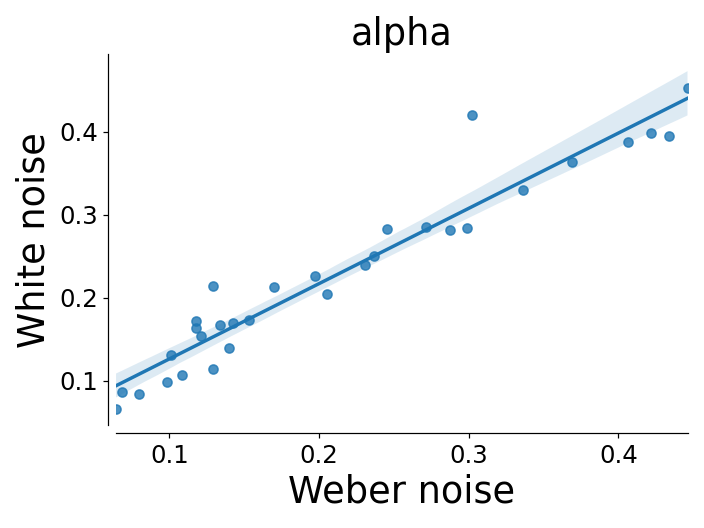

In [226]:
calculcate_correlation_alphas('4', wb_, wh_)

<IPython.core.display.Javascript object>


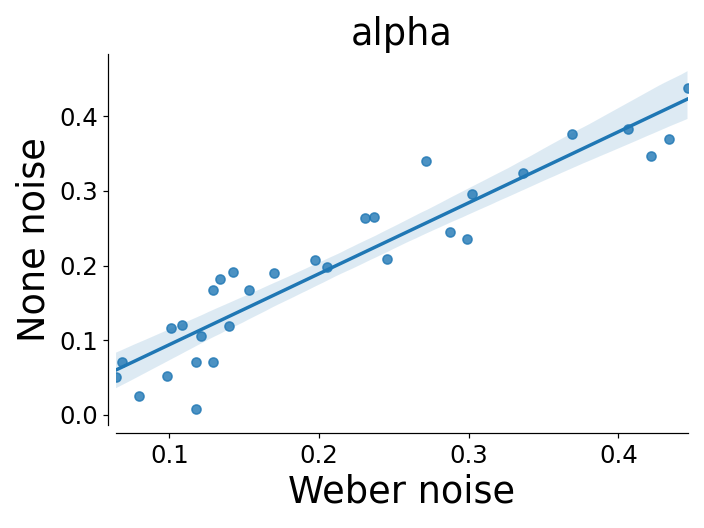

In [231]:
calculcate_correlation_alphas('4', wb_, nn_)

<IPython.core.display.Javascript object>


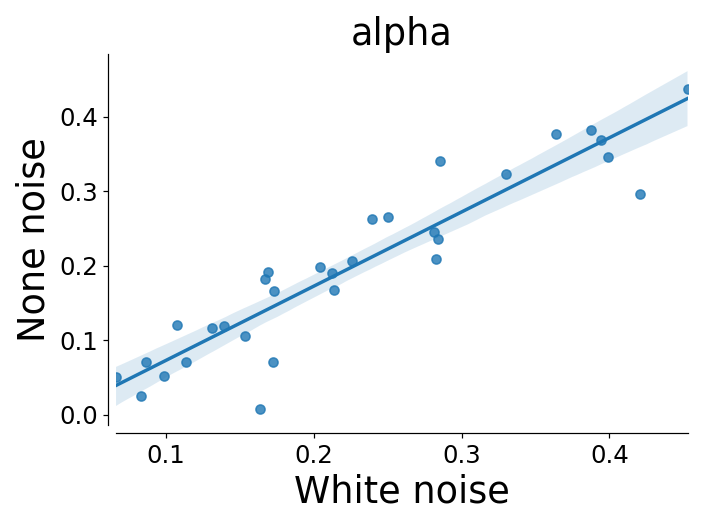

In [233]:
calculcate_correlation_alphas('4', wh_, nn_)